In [1]:
import iris
import numpy as np
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
from iris.coord_categorisation import add_hour

In [3]:
path = "/short/tp28/eh6215/ESCI/diurnal/"
data = {}
for i,name in enumerate(["BARPAC-M","BARPAC-T","BARPAR-E","TRMM"]):
    data[name] = iris.load_cube(path+name+".nc")
    data[name].data=data[name].data.filled(0)
    if name=='TRMM':
         add_hour(data[name],'time','hour')
         data[name].coord('hour').points = np.arange(0,24*3,3)%24
    else: 
        data[name].units='mm/s'
        data[name].convert_units('mm/hr')
    data[name] = data[name].aggregated_by('hour',iris.analysis.MEAN)

#data['TRMM'] =data['TRMM'][[4,5,6,7,0,1,2,3]]


In [6]:
phase,amp = {},{}
for name in ["BARPAC-M","BARPAC-T","BARPAR-E",'TRMM']:
    F=np.fft.fft(np.array(data[name].data[index]),axis=0)[1]
    amp[name] = data[name][0].copy(data=np.hypot(F.real,F.imag))/data[name].collapsed('time',iris.analysis.MEAN)
    phase[name] = data[name][0].copy(data=((np.arctan2(F.real,F.imag)/np.pi*12+6-10.5)%24))
    #phase[name].data = np.ma.masked_array(phase[name].data,amp[name].data<0.5)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'hour'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'doyr'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.na

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


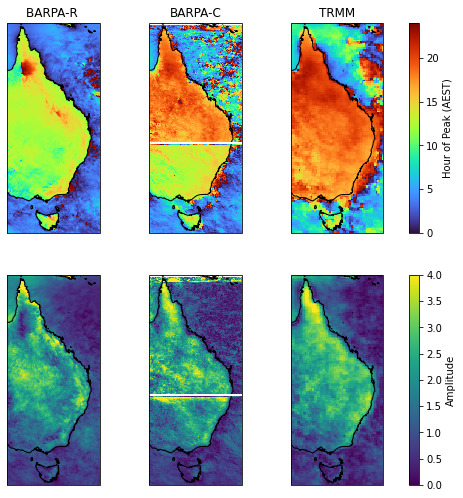

In [7]:
cx =iris.Constraint(longitude=lambda x:140<=x<=155)
cy =iris.Constraint(latitude=lambda y:-44<=y<=-10)

ax=[]
plt.figure(figsize=(9,8.5))
ax.append(plt.subplot(231,projection=ccrs.PlateCarree()))
iplt.pcolormesh(phase['BARPAR-E'].extract(cx&cy),vmin=0,vmax=24,cmap='turbo')
plt.xlim(140,155)
plt.ylim(-44,-10)
ax[-1].coastlines()
plt.title("BARPA-R ")
ax.append(plt.subplot(232,projection=ccrs.PlateCarree()))
iplt.pcolormesh(phase['BARPAC-T'].extract(cx&cy),vmin=0,vmax=24,cmap='turbo')
iplt.pcolormesh(phase['BARPAC-M'].extract(cx&cy),vmin=0,vmax=24,cmap='turbo')
plt.xlim(140,155)
plt.ylim(-44,-10)
ax[-1].coastlines()
plt.plot([140,155],[-29.5,-29.5],'w',lw=2)
plt.title("BARPA-C")
ax.append(plt.subplot(233,projection=ccrs.PlateCarree()))
a=iplt.pcolormesh(phase['TRMM'].extract(cx&cy),vmin=0,vmax=24,cmap='turbo')
ax[-1].coastlines()
plt.xlim(140,155)
plt.ylim(-44,-10)

c=plt.colorbar(a,ax=ax)
c.set_label("Hour of Peak (AEST)")

ax=[]
plt.title("TRMM")
ax.append(plt.subplot(234,projection=ccrs.PlateCarree()))
iplt.pcolormesh(amp['BARPAR-E'].extract(cx&cy),vmin=0,vmax=4,cmap='viridis')
ax[-1].coastlines()
plt.xlim(140,155)
plt.ylim(-44,-10)
ax.append(plt.subplot(235,projection=ccrs.PlateCarree()))
iplt.pcolormesh(amp['BARPAC-T'].extract(cx&cy),vmin=0,vmax=4,cmap='viridis')
iplt.pcolormesh(amp['BARPAC-M'].extract(cx&cy),vmin=0,vmax=4,cmap='viridis')
plt.plot([140,155],[-29.5,-29.5],'w',lw=2)
ax[-1].coastlines()
plt.xlim(140,155)
plt.ylim(-44,-10)
ax.append(plt.subplot(236,projection=ccrs.PlateCarree()))
a=iplt.pcolormesh(amp['TRMM'].extract(cx&cy),vmin=0,vmax=4,cmap='viridis')
ax[-1].coastlines()
plt.xlim(140,155)
plt.ylim(-44,-10)

c=plt.colorbar(a,ax=ax)
c.set_label("Amplitude")


In [20]:
3%2

1

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib

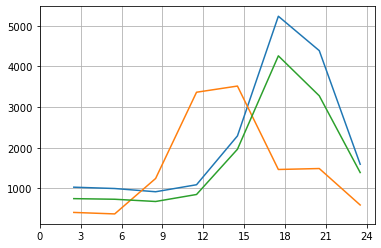

In [5]:
cx = iris.Constraint(longitude = lambda x: 142<=x<=143)
cy = iris.Constraint(latitude=lambda y: -13<=y<=-12)
index = [5,6,7,0,1,2,3,4]
for name in ["BARPAC-T","BARPAR-E",'TRMM']:
    plt.plot(((data["BARPAC-T"].coord('hour').points+10+1.5)%24)[index],3600*data[name].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN).data[index],label=name)

plt.xticks(np.arange(0,25,3))
plt.grid()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21

BARPAC-T 5.516563024470461
BARPAR-E 0.8884453260329366


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


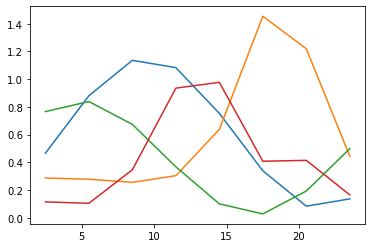

In [ ]:
for name in ["BARPAC-T","BARPAR-E"]:
    F=np.fft.fft(data[name].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN).data)
    print(name,((np.arctan2(F[1].real,F[1].imag)/np.pi*12+6-10.5)%24))
    F2=F.copy()
    F2[2:-1] = 0
    plt.plot(((data["BARPAC-T"].coord('hour').points+10+1.5)%24)[index],3600*np.fft.ifft(F2),label=name)
    plt.plot(((data["BARPAC-T"].coord('hour').points+10+1.5)%24)[index],3600*data[name].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN).data[index],label=name)
    

In [96]:
F=np.fft.fft(np.cos(np.arange(0,24,3)*np.pi/12))
((np.arctan2(F.real,F.imag)/np.pi*12+6)%24)

array([ 0.       , 12.       ,  7.9252091,  6.       , 12.       ,
       18.       , 16.0747909, 12.       ])

In [98]:
F[2:-1]

array([1.2246468e-16+2.22044605e-16j, 0.0000000e+00+2.28847549e-17j,
       3.2162453e-16+0.00000000e+00j, 0.0000000e+00-2.28847549e-17j,
       1.2246468e-16-2.22044605e-16j])

In [138]:
print(data['TRMM'].coord('hour').points)

[ 0  3  6  9 12 15 18 21]


In [163]:
TRMM = iris.load_cube(path+"TRMM.nc")

In [165]:
print(TRMM.coord('time'))

AuxCoord([2008-01-16 12:00:00, 2008-01-16 15:00:00, 2008-01-16 18:00:00,
       2008-01-16 21:00:00, 2008-01-17 00:00:00, 2008-01-17 03:00:00,
       2008-01-17 06:00:00, 2008-01-17 09:00:00, 2008-02-15 00:00:00,
       2008-02-15 03:00:00, 2008-02-15 06:00:00, 2008-02-15 09:00:00,
       2008-02-15 12:00:00, 2008-02-15 15:00:00, 2008-02-15 18:00:00,
       2008-02-15 21:00:00, 2008-06-16 00:00:00, 2008-06-16 03:00:00,
       2008-06-16 06:00:00, 2008-06-16 09:00:00, 2008-06-16 12:00:00,
       2008-06-16 15:00:00, 2008-06-16 18:00:00, 2008-06-16 21:00:00], bounds=[[1998-01-01 00:00:00, 2018-01-31 00:00:00],
       [1998-01-01 03:00:00, 2018-01-31 03:00:00],
       [1998-01-01 06:00:00, 2018-01-31 06:00:00],
       [1998-01-01 09:00:00, 2018-01-31 09:00:00],
       [1998-01-01 12:00:00, 2018-01-31 12:00:00],
       [1998-01-01 15:00:00, 2018-01-31 15:00:00],
       [1998-01-01 18:00:00, 2018-01-31 18:00:00],
       [1998-01-01 21:00:00, 2018-01-31 21:00:00],
       [1998-02-01 00:00:00

In [185]:
[amp[name].data.max() for name in amp]


[5.452226133356494, 6.511904900345946, 6.6929900535713065, 6.034262398421257]